In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

Loading data Sets

In [6]:
df=pd.read_csv("annex2.csv")

print(df.info()) #Contains Columns Types
print(df.head()) #previewing First Colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB
None
         Date          Time        Item Code  Quantity Sold (kilo)  \
0  2020-07-01  09:15:07.924  102900005117056                 0.396   
1  2020-07-01  09:17:27.295  102900005115960                 0.849   
2  2020-07-01  09:17:33.905  102900005117056                 0.409   
3  2020-07-

In [7]:
print(df.isnull().sum) #Counting Missing Values in each Column

<bound method DataFrame.sum of          Date   Time  Item Code  Quantity Sold (kilo)  \
0       False  False      False                 False   
1       False  False      False                 False   
2       False  False      False                 False   
3       False  False      False                 False   
4       False  False      False                 False   
...       ...    ...        ...                   ...   
878498  False  False      False                 False   
878499  False  False      False                 False   
878500  False  False      False                 False   
878501  False  False      False                 False   
878502  False  False      False                 False   

        Unit Selling Price (RMB/kg)  Sale or Return  Discount (Yes/No)  
0                             False           False              False  
1                             False           False              False  
2                             False           False              

Sales Trends

In [8]:
df["Total Sales"]=df["Quantity Sold (kilo)"]* df["Unit Selling Price (RMB/kg)"]

In [9]:
#Total Revenue
totalRevenue=df["Total Sales"].sum()
print(f"Total Revenue: ₹{totalRevenue:.2f}")

#Revenue Per Item
SalesPerItem=df.groupby("Item Code")["Total Sales"].sum()
print(SalesPerItem)

Total Revenue: ₹3369766.48
Item Code
102900005115168     3506.0886
102900005115199    10547.7653
102900005115250    60116.3443
102900005115625      554.5000
102900005115748     2877.1296
                      ...    
106971533455008     6437.0000
106971563780002       39.2000
106972776821582      867.0000
106973223300667       12.9000
106973990980123      244.0000
Name: Total Sales, Length: 246, dtype: float64


Graphs

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30480\810850349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topItems.index, y=topItems.values, palette="coolwarm")


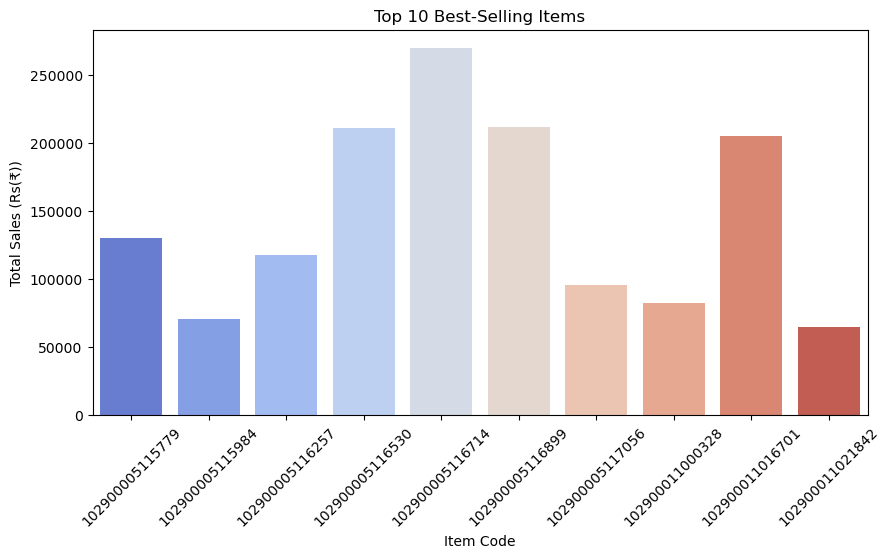

In [10]:
topItems=SalesPerItem.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=topItems.index, y=topItems.values, palette="coolwarm")
plt.title("Top 10 Best-Selling Items")
plt.xlabel("Item Code")
plt.ylabel("Total Sales (Rs(₹))")
plt.xticks(rotation=45)
plt.show()

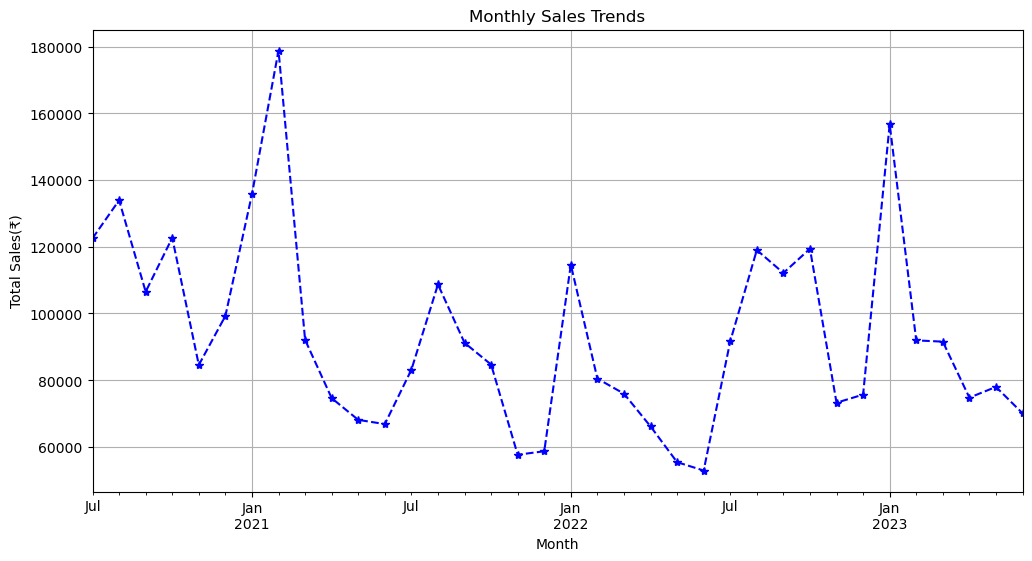

In [11]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.to_period("M")
MonthlySales=df.groupby("Month")["Total Sales"].sum()

plt.figure(figsize=(12,6))
MonthlySales.plot(marker="*",linestyle="--",color="b")

plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales(₹)")
plt.grid(True)
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30480\1858810469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discountSales.index, y=discountSales.values, palette="muted")


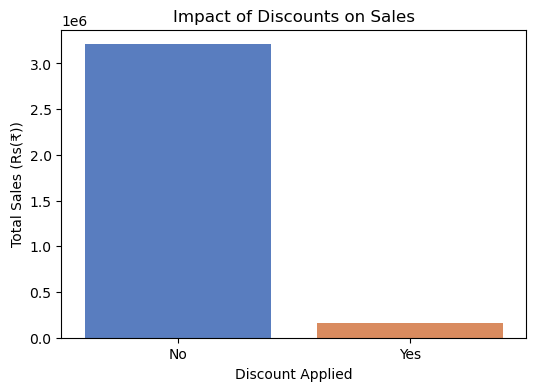

In [12]:
discountSales = df.groupby("Discount (Yes/No)")["Total Sales"].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=discountSales.index, y=discountSales.values, palette="muted")
plt.title("Impact of Discounts on Sales")
plt.xlabel("Discount Applied")
plt.ylabel("Total Sales (Rs(₹))")
plt.show()


In [16]:
df["Time"]=pd.to_datetime(df["Time"],format="%H:%M:%S.%f",errors="coerce").dt.hour

In [17]:
PeakSales=df.groupby("Time")["Total Sales"].sum()

In [19]:


# Sample timing
start_time = time.time()

# Use Pandas' fast conversion method with format specified
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce", cache=True)

end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")


Time taken: 0.06 seconds


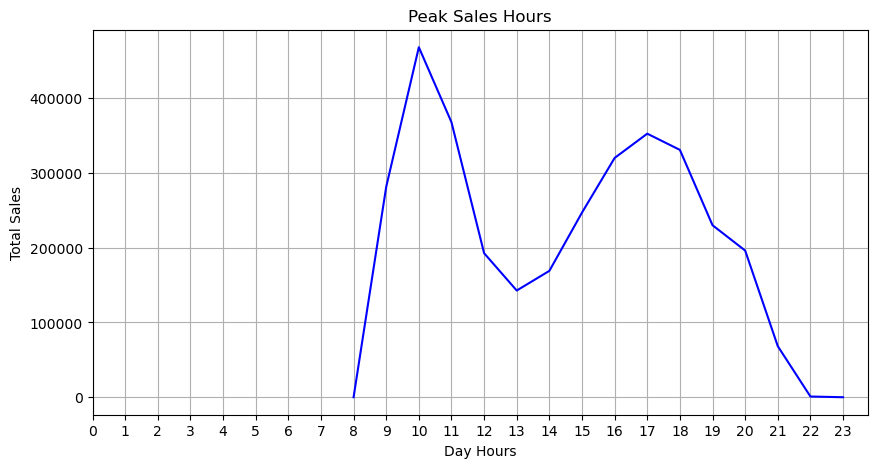

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x=PeakSales.index,y=PeakSales.values,markers="*",color="b")

plt.xticks(range(0,24))
plt.title("Peak Sales Hours")
plt.xlabel("Day Hours")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()